## Sentiment Analysis using Twitter Dat

### Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [2]:
# reading the train data and storing in dataframe
train = pd.read_csv('twitter_train.csv')
train_original = train.copy()
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [3]:
# information about df
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [4]:
train.shape

(31962, 3)

In [5]:
test = pd.read_csv('twitter_test.csv')
test_original = test.copy()
test

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."
...,...,...
17192,49155,thought factory: left-right polarisation! #tru...
17193,49156,feeling like a mermaid ð #hairflip #neverre...
17194,49157,#hillary #campaigned today in #ohio((omg)) &am...
17195,49158,"happy, at work conference: right mindset leads..."


In [6]:
test.shape

(17197, 2)

In [7]:
#Data Preprocessing - Data integration, Data Cleaning, Data Reduction, Data Transformation(Normalization,Aggeragation,generalization)

#Combine the train.csv and test.csv files

combine = train.append(test,ignore_index=True,sort=True)

C:\Users\sidha\AppData\Local\Temp\ipykernel_1848\3505690960.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combine = train.append(test,ignore_index=True,sort=True)


In [8]:
combine.tail()

,id,label,tweet
49154,49155,NaN,thought factory: left-right polarisation! #tru...
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverre...
49156,49157,NaN,#hillary #campaigned today in #ohio((omg)) &am...
49157,49158,NaN,"happy, at work conference: right mindset leads..."
49158,49159,NaN,"my song ""so glad"" free download! #shoegaze ..."


In [9]:
#Removing twitter user handles in the input text
def remove_pattern(text,pattern):
  r = re.findall(pattern,text)

  for i in r:
    text = re.sub(i,"",text)

  return text

In [10]:
#Removing Twitter Handles(@User)
combine['Clean_Tweets'] = np.vectorize(remove_pattern)(combine['tweet'], "@[\w]*")
combine.head()

,id,label,tweet,Clean_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [11]:
#Removing Punctuation,Numbers, and Special Characters
#Here we will replace everything except characters and hashtags with spaces.

combine['Clean_Tweets'] = combine['Clean_Tweets'].str.replace("[^a-zA-Z#]"," ")


C:\Users\sidha\AppData\Local\Temp\ipykernel_1848\3833116735.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  combine['Clean_Tweets'] = combine['Clean_Tweets'].str.replace("[^a-zA-Z#]"," ")


In [12]:
#Removing Short Words(Stop Words)
combine['Clean_Tweets'] = combine['Clean_Tweets'].apply(lambda x:' '.join([w for w in x.split() if len(w)>3]))

combine.head()


,id,label,tweet,Clean_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


In [13]:
#we have done basic pre-processing now we will processing for the model
#Common pre-processing for all nlp tasks
#Tokenization(tokens are individual terms of word)

tokenized_tweet = combine['Clean_Tweets'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: Clean_Tweets, dtype: object

In [14]:
#Stemming(narrow down into a single common word.) also we have lemmatization

from nltk import PorterStemmer

ps = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [ps.stem(i) for i in x])
tokenized_tweet.head()


0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: Clean_Tweets, dtype: object

In [15]:
#Now lets Stitch these tokens back  together or combine words into a single sentence
for i in range(len(tokenized_tweet)):
  tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

combine['Clean_Tweets'] = tokenized_tweet
combine.head()


,id,label,tweet,Clean_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0.0,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguid societi #motiv


So finally these are the basic steps to follow when we have to Pre-Process a dataset containing textual data.


In [16]:
#Data Visualisation of frequent words
#it will display the frequent words
#A WordCloud is a visualisation wherein the most frequent words appear in large size and the less frequent words appear in smaller sizes.

from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests

In [17]:
all_words_positive = ' '.join(text for text in combine['Clean_Tweets'][combine['label']==0])

In [18]:
# combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))
image_colors = ImageColorGenerator(Mask)
wc = WordCloud(background_color='black', height=1500,width=4000,mask=Mask).generate(all_words_positive)

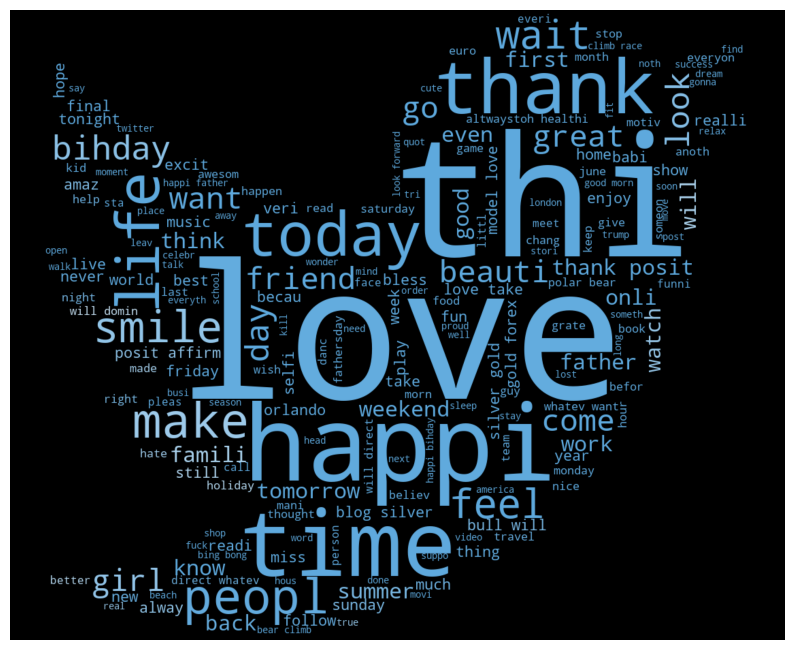

In [19]:
plt.figure(figsize=(10,20))
plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")

plt.axis('off')
plt.show()

In [20]:
all_words_negative= ' '.join(text for text in combine['Clean_Tweets'][combine['label']==1])

In [21]:

Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

image_colors = ImageColorGenerator(Mask)

wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(all_words_negative)


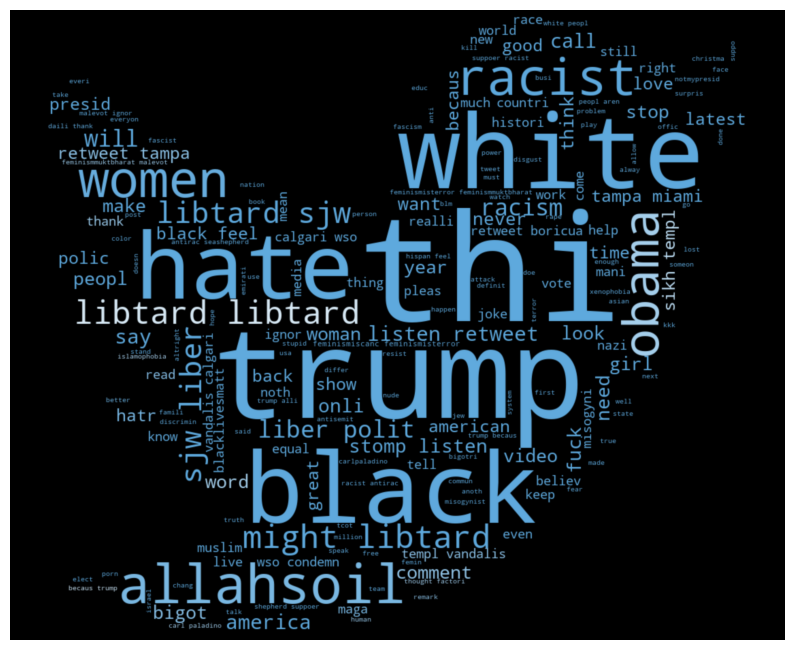

In [22]:
# Size of the image generated 
plt.figure(figsize=(10,20))

plt.imshow(wc.recolor(color_func=image_colors),interpolation="gaussian")

plt.axis('off')
plt.show()

In [24]:
#Understanding the impact of Hashtags on tweets sentiment
def Hashtags_Extract(x):
  hashtags=[]

  for i in x:
    ht = re.findall(r'#(\w+)',i)
    hashtags.append(ht)
  
  return hashtags

In [25]:
#A nested list of all the hashtags from the positive reviews from the dataset.
ht_positive = Hashtags_Extract(combine['Clean_Tweets'][combine['label']==0])
ht_positive_unnest = sum(ht_positive,[])
print(ht_positive_unnest)

['run', 'lyft', 'disapoint', 'getthank', 'model', 'motiv', 'allshowandnogo', 'school', 'exam', 'hate', 'imagin', 'actorslif', 'revolutionschool', 'girl', 'allin', 'cav', 'champion', 'cleveland', 'clevelandcavali', 'ireland', 'blog', 'silver', 'gold', 'forex', 'orlando', 'standwithorlando', 'pulseshoot', 'orlandoshoot', 'biggerproblem', 'selfish', 'heabreak', 'valu', 'love', 'gettingf', 'got', 'junior', 'yugyoem', 'omg', 'thank', 'posit', 'friday', 'cooki', 'euro', 'badday', 'coneofsham', 'cat', 'piss', 'funni', 'laugh', 'wine', 'weekend', 'tgif', 'gamedev', 'indiedev', 'indiegamedev', 'squad', 'upsideofflorida', 'shopalyssa', 'love', 'smile', 'media', 'pressconfer', 'antalya', 'turkey', 'throwback', 'ica', 'rip', 'orlando', 'alohafriday', 'time', 'not', 'exist', 'positivevib', 'hawaiian', 'goodnight', 'badmonday', 'taylorswift', 'travelingram', 'dalat', 'ripinkylif', 'photoshop', 'enoughisenough', 'dontphotoshopeveryth', 'wheresallthenaturalphoto', 'cedarpoint', 'thank', 'posit', 'book

In [26]:
#A nested list of all the hashtags from the negative reviews from the dataset
ht_negative = Hashtags_Extract(combine['Clean_Tweets'][combine['label']==1])
ht_negative_unnest = sum(ht_negative,[])
print(ht_negative_unnest)

['cnn', 'michigan', 'tcot', 'australia', 'opkillingbay', 'seashepherd', 'helpcovedolphin', 'thecov', 'helpcovedolphin', 'neverump', 'xenophobia', 'love', 'peac', 'race', 'ident', 'med', 'altright', 'whitesupremaci', 'linguist', 'race', 'power', 'raciolinguist', 'brexit', 'peopl', 'trump', 'republican', 'michelleobama', 'knick', 'golf', 'jewishsupremacist', 'libtard', 'sjw', 'liber', 'polit', 'trash', 'hate', 'stereotyp', 'prejudic', 'hope', 'hate', 'conflict', 'pol', 'bluelivesmatt', 'draintheswamp', 'ferguson', 'antisemit', 'hocoschool', 'columbiamd', 'hocomd', 'nazi', 'hatr', 'bigotri', 'libtard', 'sjw', 'liber', 'polit', 'fyi', 'tcot', 'topoli', 'blacklivesmatt', 'ushistori', 'eugen', 'biher', 'bigotri', 'altright', 'potu', 'theresist', 'crime', 'offic', 'black', 'retweet', 'tampa', 'miami', 'allahsoil', 'prais', 'cleveland', 'rnc', 'white', 'tamirric', 'rip', 'bigot', 'blacklivesmatt', 'feminismiscanc', 'feminismisterror', 'feminismmuktbharat', 'malevot', 'prowar', 'anti', 'islam',

In [27]:
#Plotting Bar-plots
#For Positive Tweets in the dataset
#Counting the frequency of the words having Positive Sentiment

word_freq_positive = nltk.FreqDist(ht_positive_unnest)
d = pd.DataFrame({'Hashtag':list(word_freq_positive.keys()),'Count':list(word_freq_positive.values())})



In [28]:
#Creating a dataframe for the most frequently used words in hashtags
df_positive = pd.DataFrame({'Hashtags':list(word_freq_positive.keys()),'Count':list(word_freq_positive.values())})
df_positive.head(10)

,Hashtags,Count
0,run,72
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,375
5,motiv,202
6,allshowandnogo,1
7,school,30
8,exam,9
9,hate,27


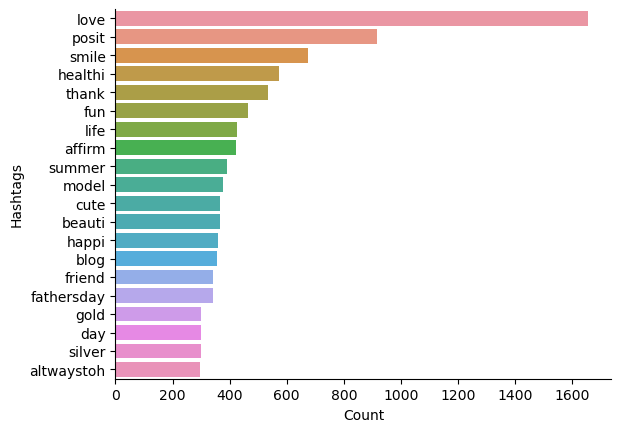

In [29]:
df_positive_plot = df_positive.nlargest(20,columns='Count')

sns.barplot(data=df_positive_plot,y='Hashtags',x='Count')
sns.despine()


In [30]:
#For Negative Tweets in the dataset
#Counting the frequency of the words having Negative Sentiment
word_freq_negative = nltk.FreqDist(ht_negative_unnest)

d = pd.DataFrame({'Hashtag':list(word_freq_negative.keys()),'Count':list(word_freq_negative.values())})

In [31]:
#Creating a dataframe for the most frequently used words in hashtags
df_negative = pd.DataFrame({'Hashtags':list(word_freq_negative.keys()),'Count':list(word_freq_negative.values())})

df_negative.head(10)

,Hashtags,Count
0,cnn,10
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,5
5,seashepherd,22
6,helpcovedolphin,3
7,thecov,4
8,neverump,8
9,xenophobia,12


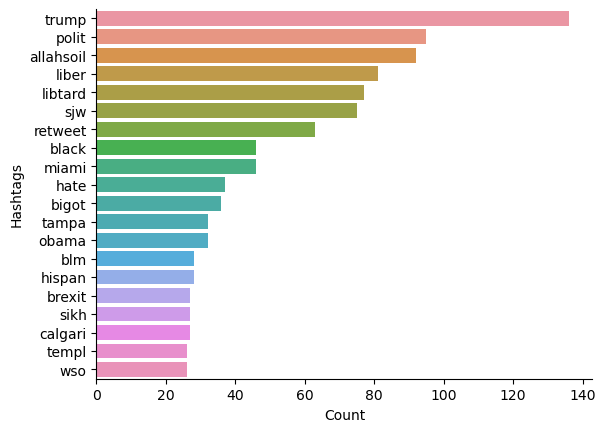

In [32]:
#Plotting the barplot for the 20 most frequent words used for hashtags
df_negative_plot = df_negative.nlargest(20,columns='Count') 

sns.barplot(data=df_negative_plot,y='Hashtags',x='Count')
sns.despine()

In [33]:
#BOW
#count occurances of a particular tokens in our text
 #for each token we have a feature column called text vectorization-->huge matrix of number
 


In [35]:

from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(combine['Clean_Tweets'])

df_bow = pd.DataFrame(bow.todense())

# df_bow
df_bow

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49154,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49155,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49156,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49157,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(max_df=0.90, min_df=2,max_features=1000,stop_words='english')

tfidf_matrix=tfidf.fit_transform(combine['Clean_Tweets'])

df_tfidf = pd.DataFrame(tfidf_matrix.todense())

df_tfidf

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49156,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Splitting our dataset into training and validation set


In [37]:
#Using the features from Bag-of-Words for training set
train_bow = bow[:31962]


train_bow.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [38]:
#Using features from TF-IDF for training set
train_tfidf_matrix = tfidf_matrix[:31962]

train_tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

### Train-Test Split

In [39]:
#Splitting the data into training and validation set
from sklearn.model_selection import train_test_split

In [40]:
#Bag-of-Words Features
x_train_bow, x_valid_bow, y_train_bow, y_valid_bow = train_test_split(train_bow,train['label'],test_size=0.3,random_state=2)

In [41]:
#TF-IDF features
x_train_tfidf, x_valid_tfidf, y_train_tfidf, y_valid_tfidf = train_test_split(train_tfidf_matrix,train['label'],test_size=0.3,random_state=17)

## Logistic Regression

In [42]:
# Model Training (Logistic Regression)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

Log_Reg = LogisticRegression(random_state=0,solver='lbfgs')

In [43]:
#Bag-of-Words Features
#Fitting the Logistic Regression Model.
Log_Reg.fit(x_train_bow,y_train_bow)

LogisticRegression(random_state=0)

In [45]:
prediction_bow = Log_Reg.predict_proba(x_valid_bow)
prediction_bow


array([[9.86501156e-01, 1.34988440e-02],
       [9.99599096e-01, 4.00904144e-04],
       [9.13577383e-01, 8.64226167e-02],
       ...,
       [8.95457155e-01, 1.04542845e-01],
       [9.59736065e-01, 4.02639345e-02],
       [9.67541420e-01, 3.24585797e-02]])

In [46]:
#Calculating the F1 score

# if prediction is greater than or equal to 0.3 than 1 else 0
# Where 0 is for positive sentiment tweets and 1 for negative sentiment tweets
prediction_int = prediction_bow[:,1]>=0.4

# converting the results to integer type
prediction_int = prediction_int.astype(np.int)
prediction_int

# calculating f1 score
log_bow = f1_score(y_valid_bow, prediction_int)

log_bow

0.5252525252525253

In [47]:
accuracy_score(y_valid_bow, prediction_int)

0.9460840546459485

In [48]:
#TF-IDF Features
#Fitting the Logistic Regression Model.

Log_Reg.fit(x_train_tfidf,y_train_tfidf)

LogisticRegression(random_state=0)

In [49]:
#Predicting the probabilities.
prediction_tfidf = Log_Reg.predict_proba(x_valid_tfidf)

# prediction_tfidf

In [50]:
#Calculating the f1 score
# if prediction is greater than or equal to 0.3 than 1 else 0
# Where 0 is for positive sentiment tweets and 1 for negative sentiment tweets
prediction_int = prediction_tfidf[:,1]>=0.4

prediction_int = prediction_int.astype(np.int)
prediction_int

# calculating f1 score
log_tfidf = f1_score(y_valid_tfidf, prediction_int)

log_tfidf

0.5461613216715256

In [51]:
accuracy_score(y_valid_tfidf, prediction_int)

0.9512983627072688

## Decision Tree Classifier

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, accuracy_score

dct = DecisionTreeClassifier(criterion='entropy', random_state=1)
dct.fit(x_train_tfidf,y_train_tfidf)
dct_tfidf = dct.predict_proba(x_valid_tfidf)

dct_tfidf=dct_tfidf[:,1]>=0.3
dct_int_tfidf=dct_tfidf.astype(np.int)
dct_score_tfidf=f1_score(y_valid_tfidf,dct_int_tfidf)
Algo_2 = ['LogisticRegression(TF-IDF)','DecisionTree(TF-IDF)']

score_2 = [log_tfidf,dct_score_tfidf]

compare_2 = pd.DataFrame({'Model':Algo_2,'F1_Score':score_2},index=[i for i in range(1,3)])

compare_2.T

,1,2
Model,LogisticRegression(TF-IDF),DecisionTree(TF-IDF)
F1_Score,0.546161,0.549882


In [56]:

Algo_best = ['LogisticRegression(Bag-of-Words)','LogisticRegression(TF-IDF)']

score_best = [log_bow,log_tfidf]

compare_best = pd.DataFrame({'Model':Algo_best,'F1_Score':score_best},index=[i for i in range(1,3)])

compare_best.T

,1,2
Model,LogisticRegression(Bag-of-Words),LogisticRegression(TF-IDF)
F1_Score,0.525253,0.546161


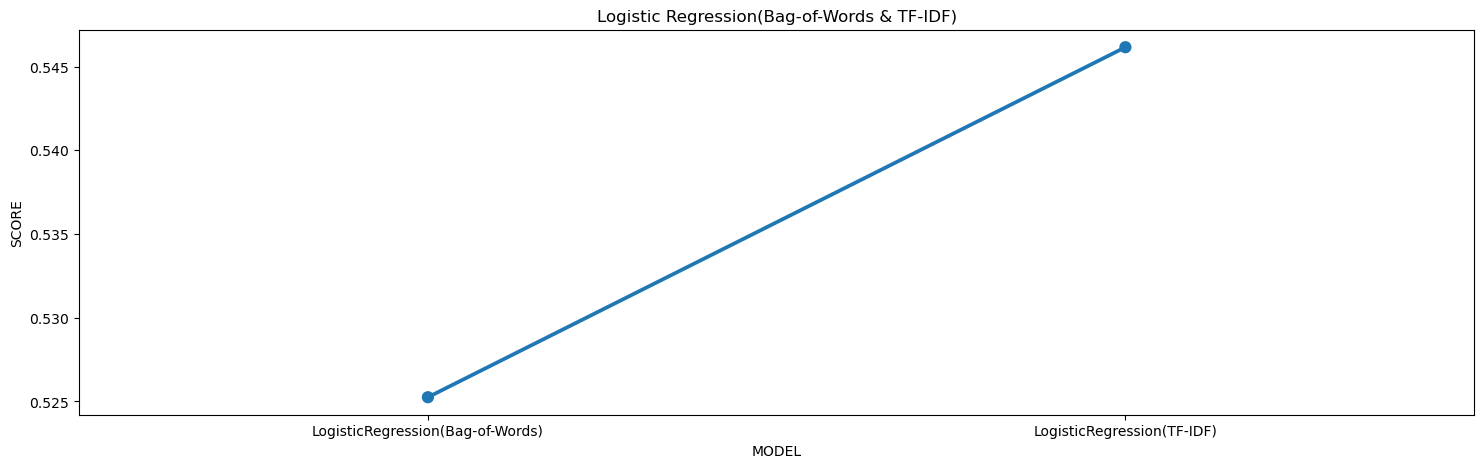

In [57]:
plt.figure(figsize=(18,5))

sns.pointplot(x='Model',y='F1_Score',data=compare_best)

plt.title('Logistic Regression(Bag-of-Words & TF-IDF)')
plt.xlabel('MODEL')
plt.ylabel('SCORE')

plt.show()

In [58]:
#Predicting the results for our test data.
#From the above comparison graph we can clearly see that the best possible F1 Score is obtained by the Logistic Regression Model using TF-IDF features.
test_tfidf = tfidf_matrix[31962:]
test_pred = Log_Reg.predict_proba(test_tfidf)

test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)

test['label'] = test_pred_int

submission = test[['id','label']]
submission.to_csv('result.csv',index=False)

In [59]:
res = pd.read_csv('result.csv')
res

,id,label
0,31963,0
1,31964,0
2,31965,0
3,31966,0
4,31967,0
...,...,...
17192,49155,1
17193,49156,0
17194,49157,0
17195,49158,0
